In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm

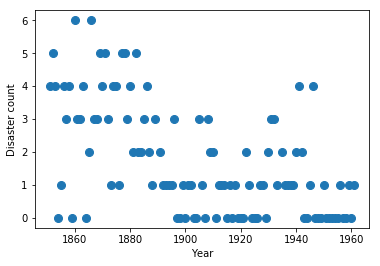

In [5]:
disaster_data = np.ma.masked_values([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                            3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                            2, 2, 3, 4, 2, 1, 3, -999, 2, 1, 1, 1, 1, 3, 0, 0,
                            1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                            0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                            3, 3, 1, -999, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                            0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], value=-999)
years = np.arange(1851, 1962)

plt.plot(years, disaster_data, 'o', markersize=8);
plt.ylabel("Disaster count")
plt.xlabel("Year");

In [19]:
# Specifying model

with pm.Model() as disaster_model:
    # Priors
    switchpoint = pm.DiscreteUniform('switchpoint', lower=years.min(), upper=years.max())
    early_rate = pm.Exponential('early_rate', 1)
    late_rate = pm.Exponential('late_rate', 1)
    # Allocate appropriate Poisson rates to years before and after current
    rate = pm.math.switch(switchpoint >= years, early_rate, late_rate)
    # Likelihood
    disasters = pm.Poisson('disasters', rate, observed=disaster_data)

In [20]:
# Fitting the model

with disaster_model:
    trace = pm.sample(10000)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [disasters_missing]
>>Metropolis: [switchpoint]
>NUTS: [late_rate, early_rate]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:10<00:00, 4005.36draws/s]
The number of effective samples is smaller than 10% for some parameters.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
switchpoint,1889.80,2.45,0.06,1885.00,1894.00,1483.78,1.0
disasters_missing__0,2.11,1.76,0.04,0.00,5.00,1504.96,1.0
disasters_missing__1,0.95,0.98,0.01,0.00,3.00,4435.92,1.0
early_rate,3.09,0.29,0.00,2.52,3.64,17815.55,1.0
late_rate,0.93,0.12,0.00,0.70,1.16,21109.11,1.0


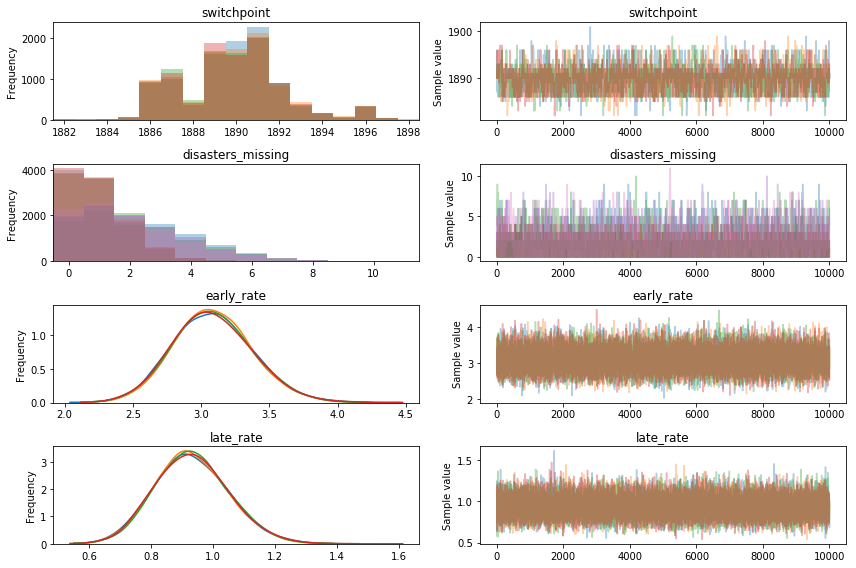

In [21]:
# Posterior analysis

pm.traceplot(trace);
pm.summary(trace).round(2)